In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("pre_taxa_sim.csv")
df

,municipio,id_municipio,ano,faixa_etaria,pop_total,pop_pad_total,pop_homem,pop_pad_homem,pop_mulher,pop_pad_mulher,...,taxa_obitos_total,taxa_obitos_homem,taxa_obitos_mulher,obitos_esp_total,obitos_esp_homem,obitos_esp_mulher,taxa_obitos_esp_total,taxa_obitos_esp_homem,taxa_obitos_esp_mulher,grupo
0,Abaeté,310020,2010,0a4,1377,1338553,702,684629,675,653924,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,2.0
1,Abaeté,310020,2010,0a4,1377,1338553,702,684629,675,653924,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,2.0
2,Abaeté,310020,2010,0a4,1377,1338553,702,684629,675,653924,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,2.0
3,Abaeté,310020,2010,0a4,1377,1338553,702,684629,675,653924,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,2.0
4,Abaeté,310020,2010,0a4,1377,1338553,702,684629,675,653924,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12851995,Vespasiano,317120,2019,>=80anos,1507,334532,528,129431,979,205101,...,66.357001,0.0,102.145046,221.985401,0.0,209.500511,66.357001,0.0,102.145046,3.0
12851996,Vespasiano,317120,2019,>=80anos,1507,334532,528,129431,979,205101,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,3.0
12851997,Vespasiano,317120,2019,>=80anos,1507,334532,528,129431,979,205101,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,3.0
12851998,Vespasiano,317120,2019,>=80anos,1507,334532,528,129431,979,205101,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,3.0


In [2]:
pop_pad_t = df['pop_pad_total'].unique().sum()
pop_pad_h = df['pop_pad_homem'].unique().sum()
pop_pad_m = df['pop_pad_mulher'].unique().sum()

In [3]:
df_19 = df[df['ano'] == 2019]
pop_19 = df_19.groupby(['agravo', 'grupo'], as_index=False).sum()

pop_19['pop_total'] = pop_19['pop_total'] / 12
pop_19['pop_homem'] = pop_19['pop_homem'] / 12
pop_19['pop_mulher'] = pop_19['pop_mulher'] / 12


pop_19['taxa_obitos_total'] = (pop_19['obitos_total'] / pop_19['pop_total']) * 100000
pop_19['taxa_obitos_homem'] = (pop_19['obitos_homem'] / pop_19['pop_homem']) * 100000
pop_19['taxa_obitos_mulher'] = (pop_19['obitos_mulher'] / pop_19['pop_mulher']) * 100000

pop_19['taxa_obitos_esp_total'] = (pop_19['obitos_esp_total'] / pop_pad_t) * 100000
pop_19['taxa_obitos_esp_homem'] = (pop_19['obitos_esp_homem'] / pop_pad_h) * 100000
pop_19['taxa_obitos_esp_mulher'] = (pop_19['obitos_esp_mulher'] / pop_pad_m) * 100000

pop_19

,agravo,grupo,id_municipio,ano,pop_total,pop_pad_total,pop_homem,pop_pad_homem,pop_mulher,pop_pad_mulher,...,obitos_mulher,taxa_obitos_total,taxa_obitos_homem,taxa_obitos_mulher,obitos_esp_total,obitos_esp_homem,obitos_esp_mulher,taxa_obitos_esp_total,taxa_obitos_esp_homem,taxa_obitos_esp_mulher
0,amebiase,1.0,1216548900,7825644,987038.0,4550297232,490872.0,2240841912,496166.0,2309455320,...,1,0.101313,0.000000,0.201545,155.019462,0.000000,159.239907,0.776750,0.000000,1.572089
1,amebiase,2.0,2556087360,16475040,4601121.0,9579573120,2197563.0,4717561920,2403558.0,4862011200,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,amebiase,3.0,2625678288,16886916,1153419.0,9819062448,568618.0,4835500968,584801.0,4983561480,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,ancilosto,1.0,1216548900,7825644,987038.0,4550297232,490872.0,2240841912,496166.0,2309455320,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ancilosto,2.0,2556087360,16475040,4601121.0,9579573120,2197563.0,4717561920,2403558.0,4862011200,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,tubresp,2.0,2556087360,16475040,4601121.0,9579573120,2197563.0,4717561920,2403558.0,4862011200,...,7,0.869353,1.501663,0.291235,2108.661527,1981.931436,87.012310,10.565790,20.165651,0.859025
185,tubresp,3.0,2625678288,16886916,1153419.0,9819062448,568618.0,4835500968,584801.0,4983561480,...,3,1.647276,2.813840,0.512995,9598.388237,8754.194380,376.285995,48.094276,89.071715,3.714868
186,veneno,1.0,1216548900,7825644,987038.0,4550297232,490872.0,2240841912,496166.0,2309455320,...,2,0.405253,0.407438,0.403091,2811.999801,1432.863252,1358.573264,14.089980,14.579021,13.412457
187,veneno,2.0,2556087360,16475040,4601121.0,9579573120,2197563.0,4717561920,2403558.0,4862011200,...,14,0.956289,1.365149,0.582470,1736.159544,1319.643682,435.071734,8.699308,13.427041,4.295227


In [4]:
df_r = df[df['ano'] != 2019]
pop_r = df_r.groupby(['agravo', 'grupo'], as_index=False).sum()

pop_r['pop_total'] = pop_r['pop_total'] / 12
pop_r['pop_homem'] = pop_r['pop_homem'] / 12
pop_r['pop_mulher'] = pop_r['pop_mulher'] / 12

pop_r['taxa_obitos_total'] = (pop_r['obitos_total'] / pop_r['pop_total']) * 100000
pop_r['taxa_obitos_homem'] = (pop_r['obitos_homem'] / pop_r['pop_homem']) * 100000
pop_r['taxa_obitos_mulher'] = (pop_r['obitos_mulher'] / pop_r['pop_mulher']) * 100000

pop_r['taxa_obitos_esp_total'] = (pop_r['obitos_esp_total'] / (pop_pad_t * 9)) * 100000
pop_r['taxa_obitos_esp_homem'] = (pop_r['obitos_esp_homem'] / (pop_pad_h * 9)) * 100000
pop_r['taxa_obitos_esp_mulher'] = (pop_r['obitos_esp_mulher'] / (pop_pad_m * 9)) * 100000

pop_r

,agravo,grupo,id_municipio,ano,pop_total,pop_pad_total,pop_homem,pop_pad_homem,pop_mulher,pop_pad_mulher,...,obitos_mulher,taxa_obitos_total,taxa_obitos_homem,taxa_obitos_mulher,obitos_esp_total,obitos_esp_homem,obitos_esp_mulher,taxa_obitos_esp_total,taxa_obitos_esp_homem,taxa_obitos_esp_mulher
0,amebiase,1.0,10948940100,70256376,8310203.0,40952675088,4133773.0,20167577208,4176430.0,20785097880,...,0,0.012033,0.024191,0.000000,243.368154,238.598773,0.000000,0.135493,0.269742,0.000000
1,amebiase,2.0,23004786240,147908160,40120632.0,86216158080,19189839.0,42458057280,20930793.0,43758100800,...,6,0.022432,0.015633,0.028666,4989.238642,3758.105667,957.624421,2.777710,4.248642,1.050456
2,amebiase,3.0,23631104592,151605864,9818311.0,88371562032,4845402.0,43519508712,4972909.0,44852053320,...,1,0.020370,0.020638,0.020109,1470.204125,839.961538,837.146939,0.818522,0.949600,0.918300
3,ancilosto,1.0,10948940100,70256376,8310203.0,40952675088,4133773.0,20167577208,4176430.0,20785097880,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ancilosto,2.0,23004786240,147908160,40120632.0,86216158080,19189839.0,42458057280,20930793.0,43758100800,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,tubresp,2.0,23004786240,147908160,40120632.0,86216158080,19189839.0,42458057280,20930793.0,43758100800,...,104,1.066783,1.688394,0.496876,78089.809605,61654.956399,17319.998366,43.475735,69.702622,18.998995
185,tubresp,3.0,23631104592,151605864,9818311.0,88371562032,4845402.0,43519508712,4972909.0,44852053320,...,18,0.896285,1.444669,0.361961,53049.756765,43918.362520,8645.246161,29.534932,49.650915,9.483314
186,veneno,1.0,10948940100,70256376,8310203.0,40952675088,4133773.0,20167577208,4176430.0,20785097880,...,4,0.180501,0.266101,0.095776,5042.007200,3323.981810,1746.930744,2.807088,3.757853,1.916278
187,veneno,2.0,23004786240,147908160,40120632.0,86216158080,19189839.0,42458057280,20930793.0,43758100800,...,25,0.279158,0.453365,0.119441,9423.320670,7161.960666,2237.347765,5.246341,8.096793,2.454236


In [5]:
def plot_grafico_dif(df1, df2, taxa, titulo, xlabel):
    aux = (df1.groupby(['grupo', 'agravo'])[taxa].
           sum().
           unstack(0))
    aux2 = (df2.groupby(['grupo', 'agravo'])[taxa].
            sum().
            unstack(0))

    fig, ax = plt.subplots(1, 1, figsize=(22, 18))

    ax.set_title(f"{titulo}", fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    ax.set_ylabel("agravo", fontsize=18)

    aux3 = aux - aux2

    (aux3.sort_values(ascending=False, by=1.0).
     head(15)[::-1].
     plot.barh(ax=ax, edgecolor="k", width=0.7))

    plt.tick_params(axis='x', which='major', labelsize=18)
    plt.tick_params(axis='y', which='major', labelsize=18)
    plt.axvline()
    plt.legend(fontsize=18, loc='lower right')

    
    return ax, fig

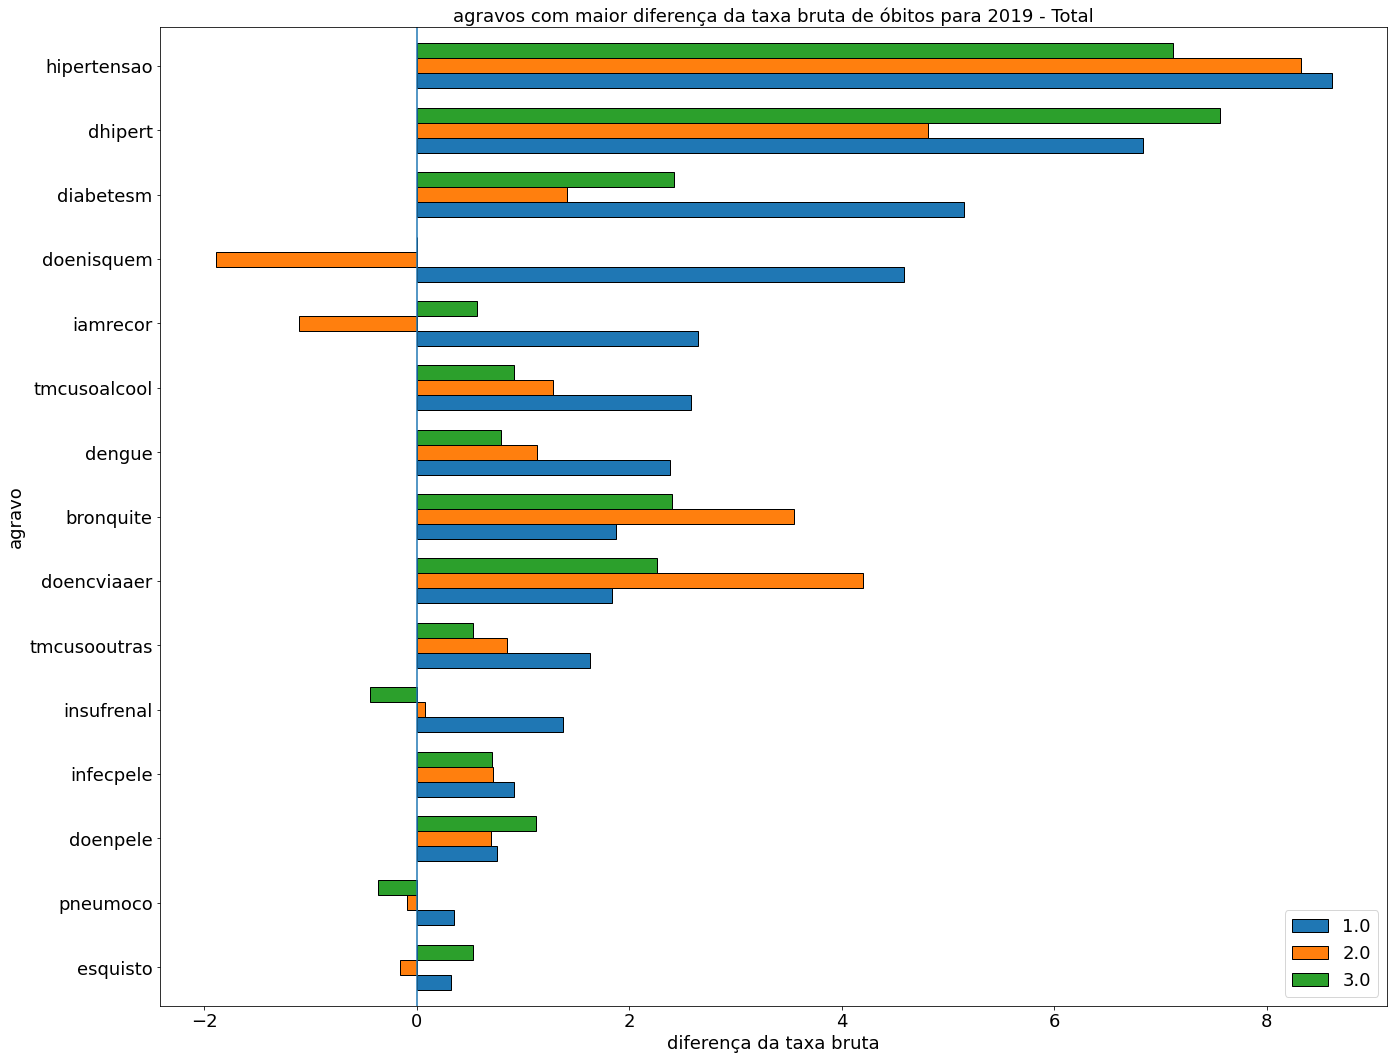

In [6]:
ax, fig = plot_grafico_dif(pop_19, pop_r,
                         'taxa_obitos_total', 
                         "agravos com maior diferença da taxa bruta de óbitos para 2019 - Total",
                        "diferença da taxa bruta")
plt.savefig("dif_taxa_bruta.png")

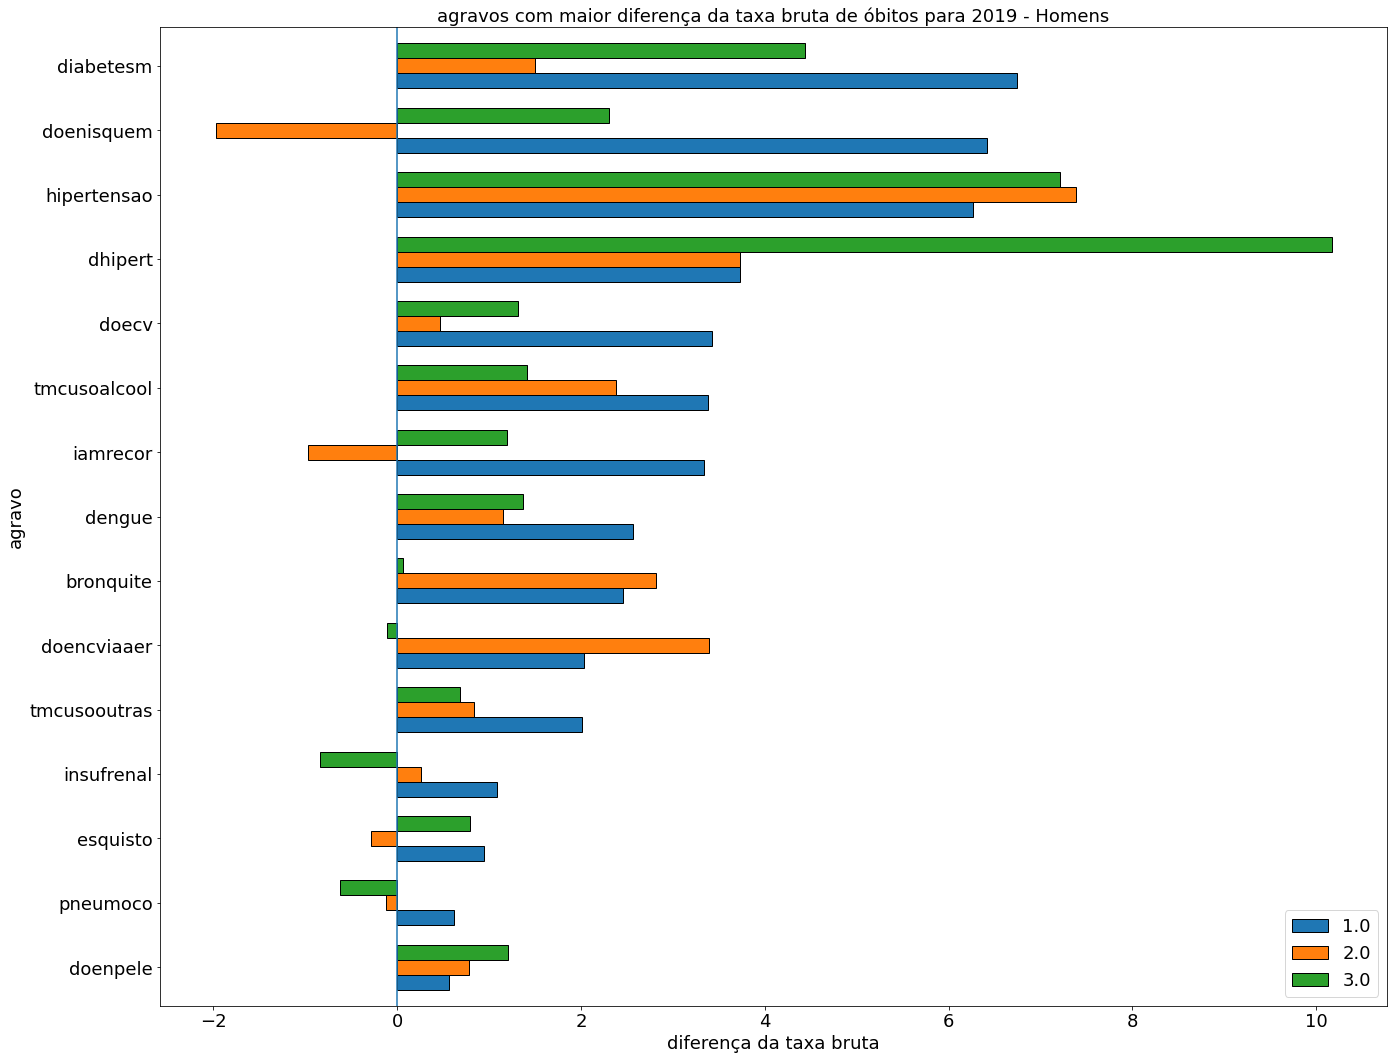

In [7]:
ax, fig = plot_grafico_dif(pop_19, pop_r,
                         'taxa_obitos_homem', 
                         "agravos com maior diferença da taxa bruta de óbitos para 2019 - Homens",
                        "diferença da taxa bruta")
plt.savefig("dif_taxa_bruta_homem.png")

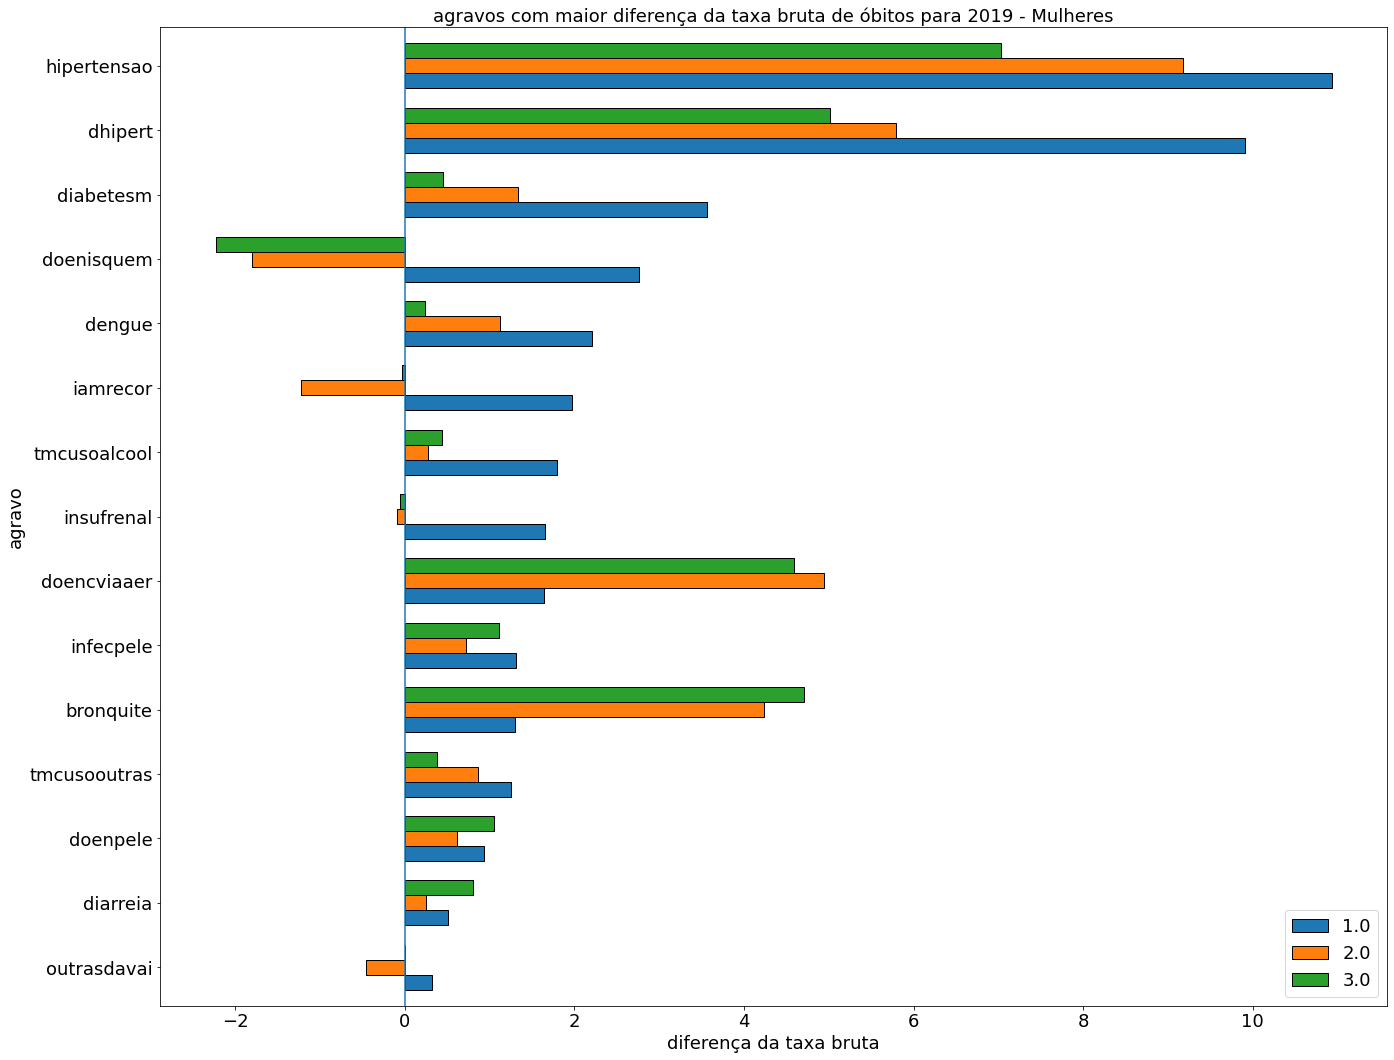

In [8]:
ax, fig = plot_grafico_dif(pop_19, pop_r,
                         'taxa_obitos_mulher', 
                         "agravos com maior diferença da taxa bruta de óbitos para 2019 - Mulheres",
                        "diferença da taxa bruta")
plt.savefig("dif_taxa_bruta_mulher.png")

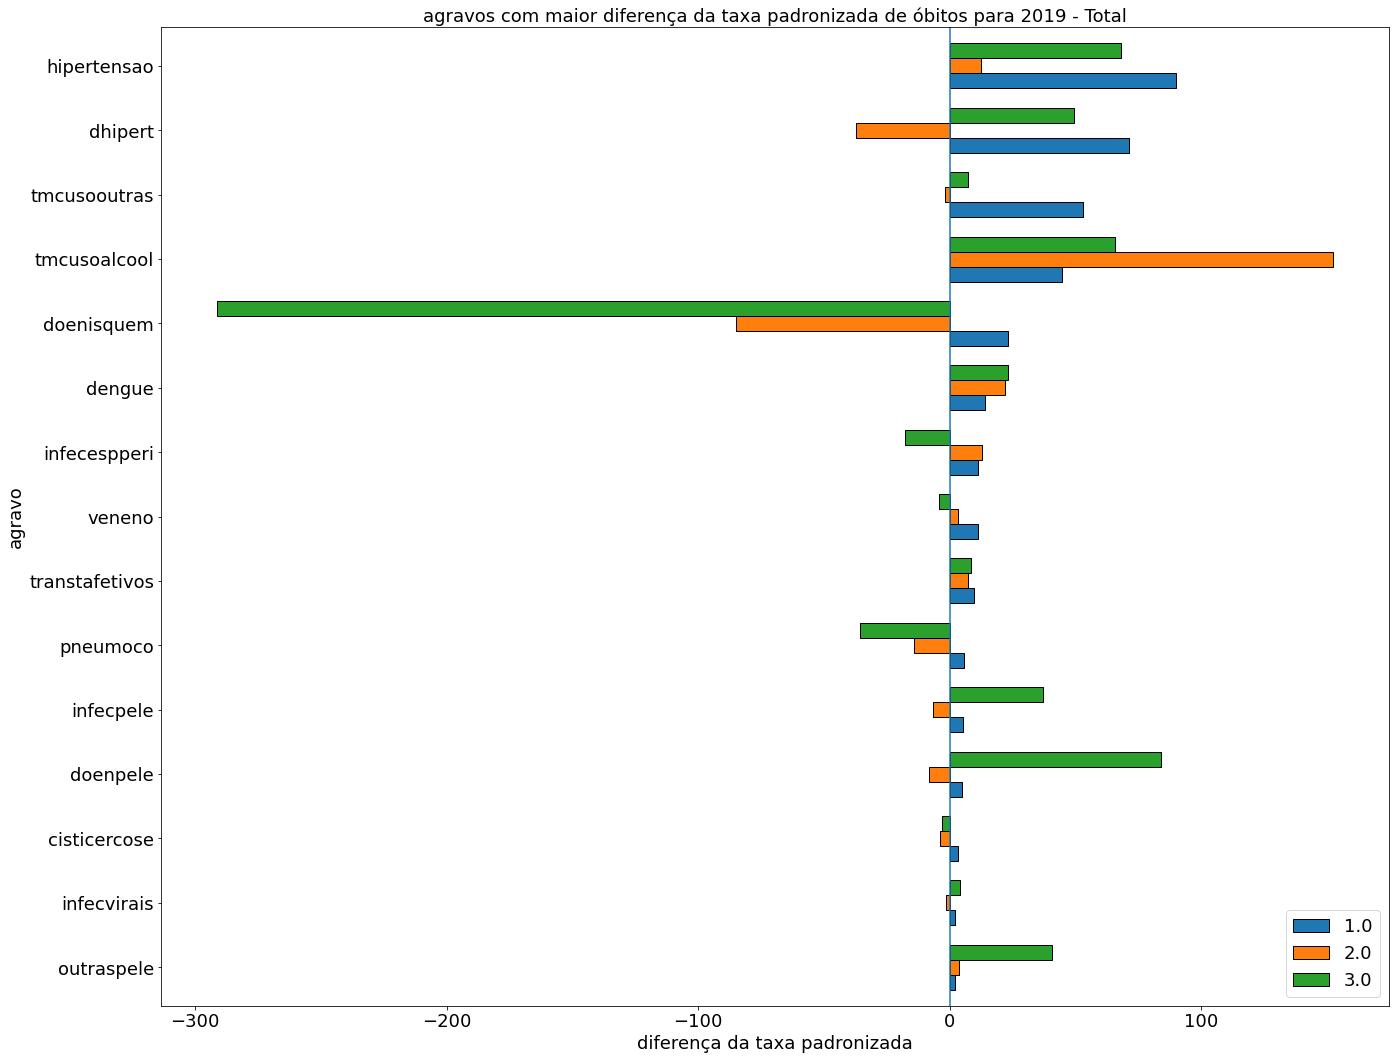

In [9]:
ax, fig = plot_grafico_dif(pop_19, pop_r,
                         'taxa_obitos_esp_total', 
                         "agravos com maior diferença da taxa padronizada de óbitos para 2019 - Total",
                        "diferença da taxa padronizada")
plt.savefig("dif_taxa_padronizada.png")

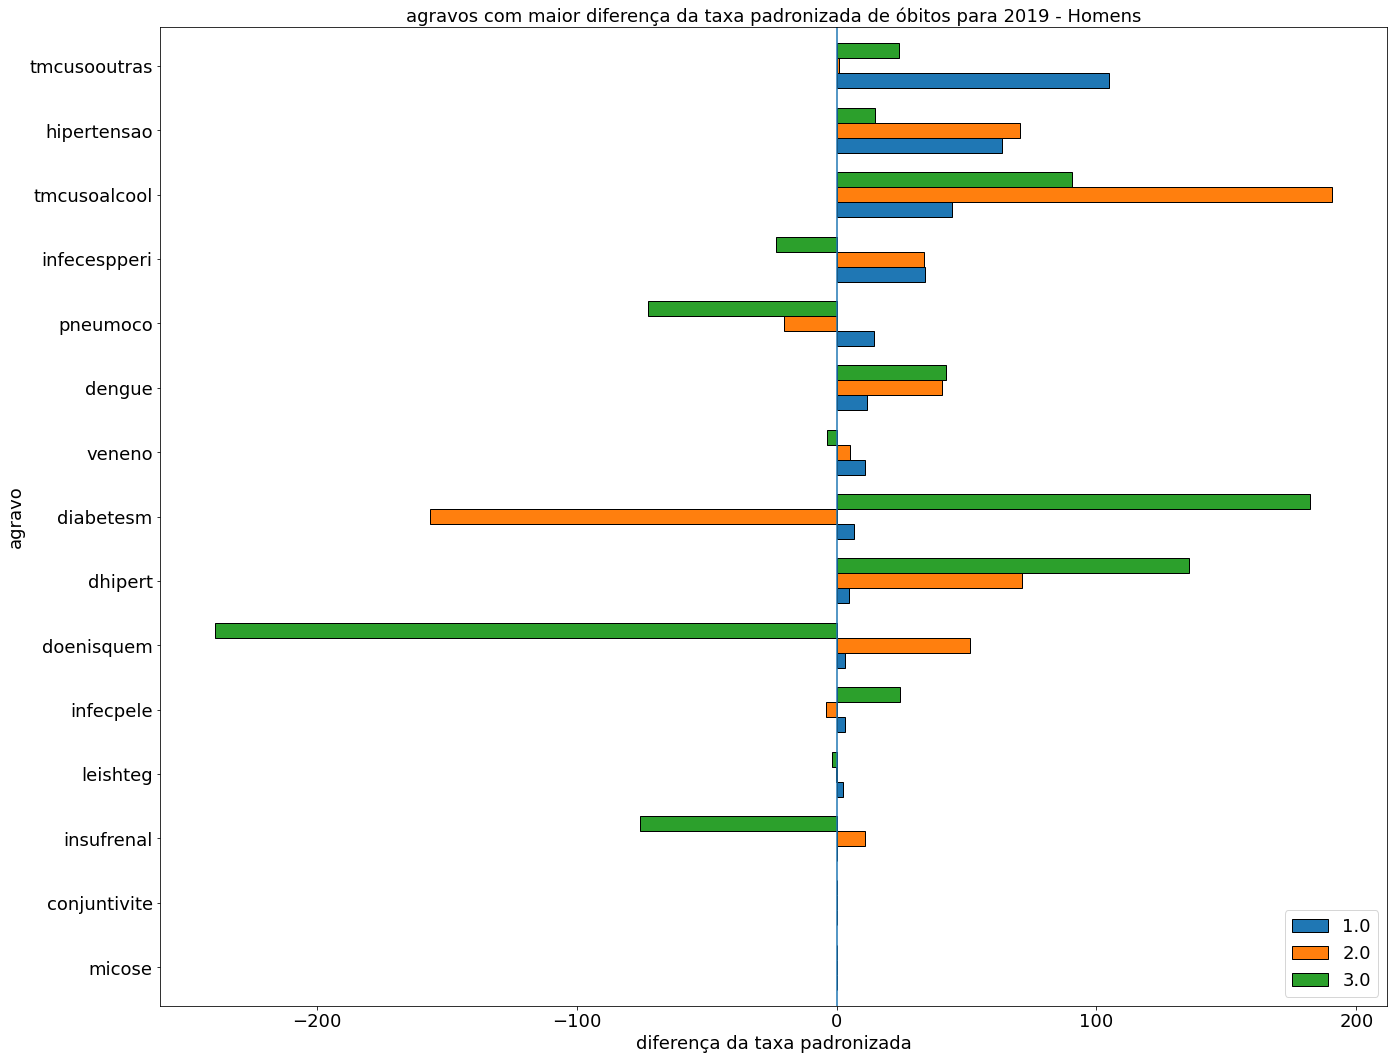

In [10]:
ax, fig = plot_grafico_dif(pop_19, pop_r,
                         'taxa_obitos_esp_homem', 
                         "agravos com maior diferença da taxa padronizada de óbitos para 2019 - Homens",
                        "diferença da taxa padronizada")
plt.savefig("dif_taxa_padrao_homem.png")

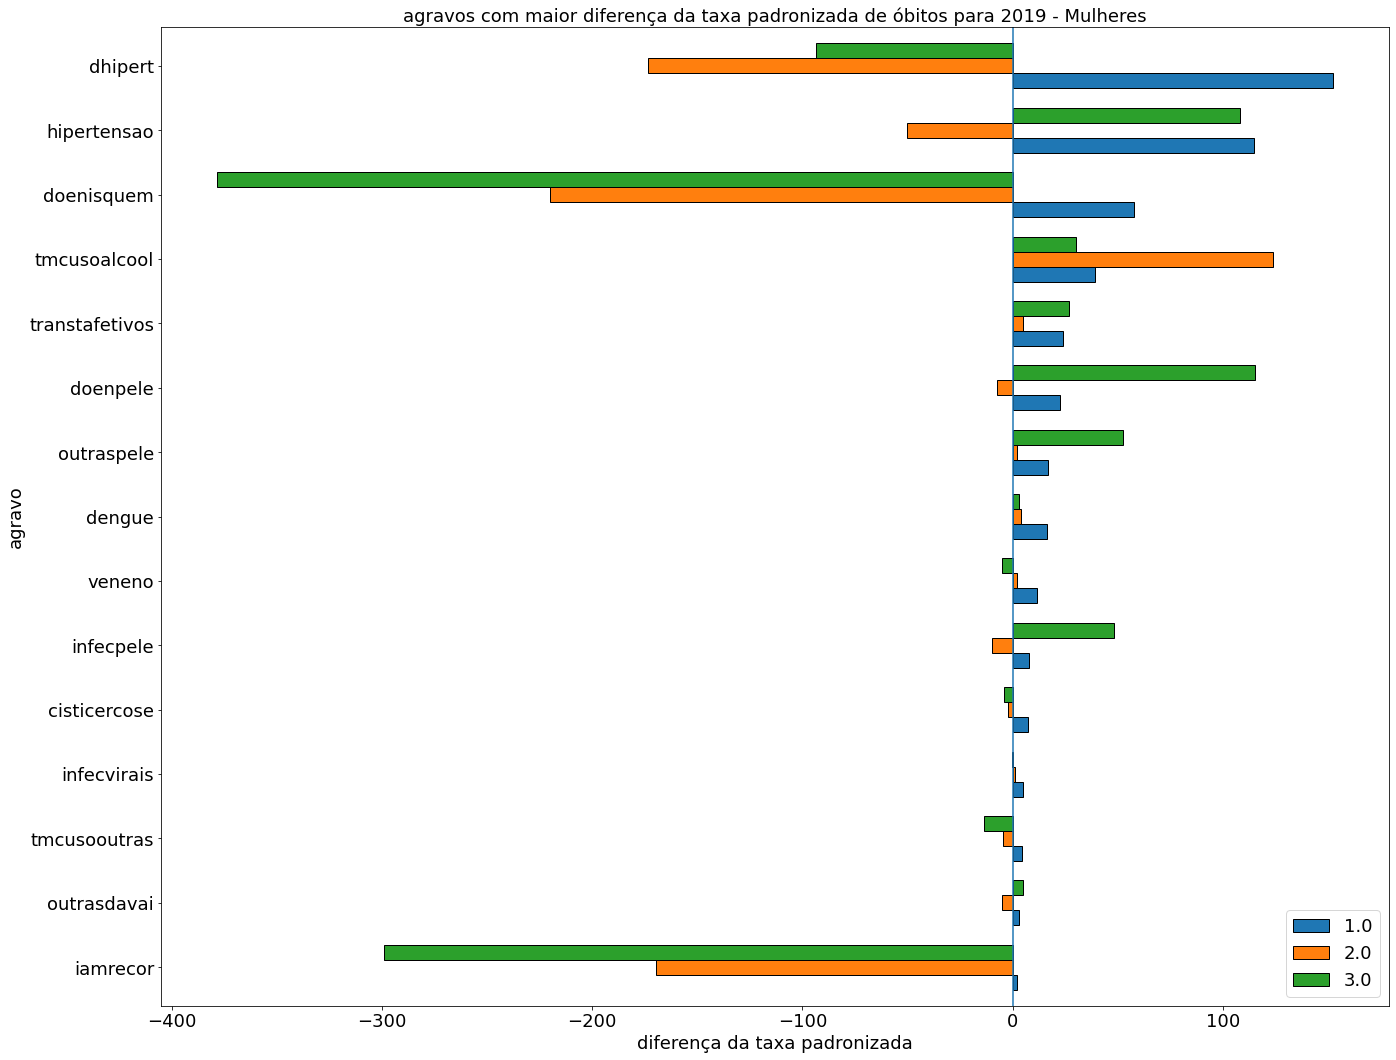

In [11]:
ax, fig = plot_grafico_dif(pop_19, pop_r,
                         'taxa_obitos_esp_mulher', 
                         "agravos com maior diferença da taxa padronizada de óbitos para 2019 - Mulheres",
                        "diferença da taxa padronizada")
plt.savefig("dif_taxa_padrao_mulher.png")